# Principal Components Analysis(PCA)

In [335]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score,davies_bouldin_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

### 1.Load the dataset and perform basic data exploration

In [336]:
df = pd.read_csv('wine.csv')
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [337]:
print('PCA data Describe:')
df.describe()

PCA data Describe:


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [338]:
print('PCA data information:')
df.info()

PCA data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [339]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [340]:
numarical_columns = df.select_dtypes(include = np.number).columns
df[numarical_columns] = df[numarical_columns].apply(pd.to_numeric,errors = 'coerce')
print("Mean of data")
print(np.mean(df[numarical_columns]))

Mean of data
64.33398715850723


In [341]:
columns_mean = df[numarical_columns].mean()
df[numarical_columns] = df[numarical_columns].fillna(columns_mean)
print("Filling the null values with the mean of particular columns")
df.isnull().sum()

Filling the null values with the mean of particular columns


Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

### 2.Examine the distribution of features using histograms, box plots, or density plots

#### 1.Histograms

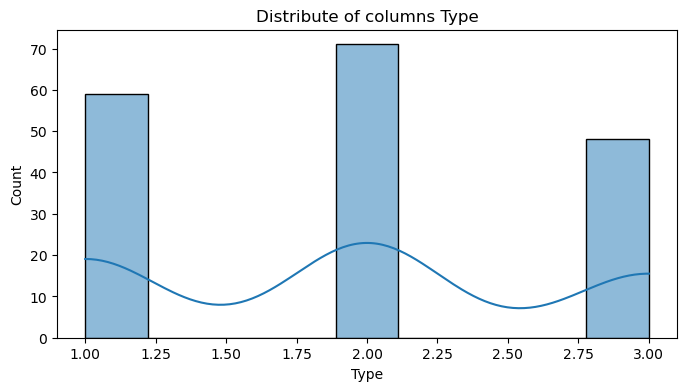

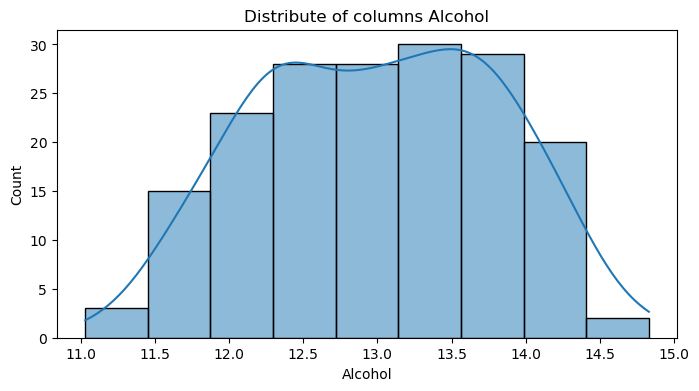

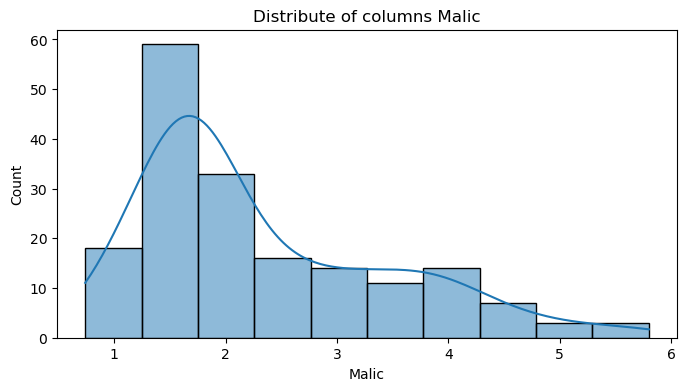

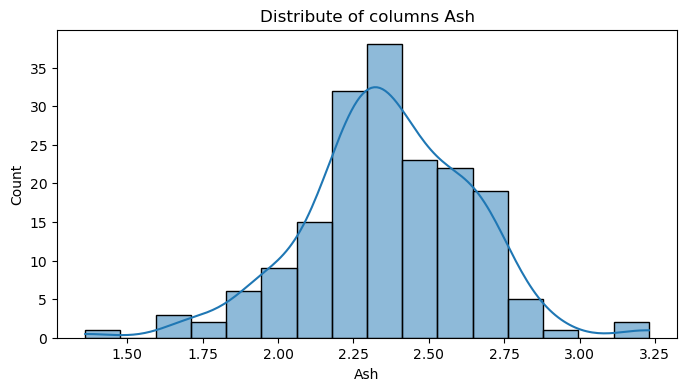

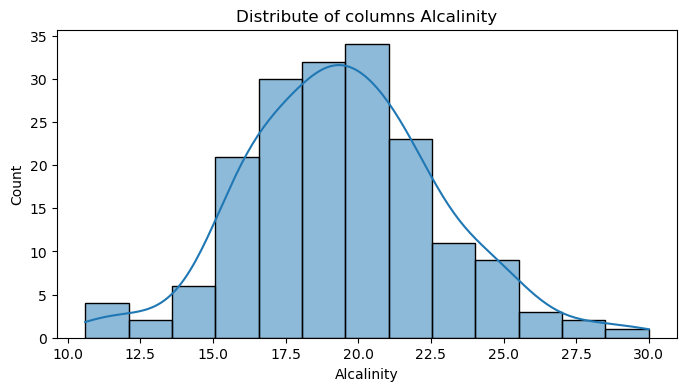

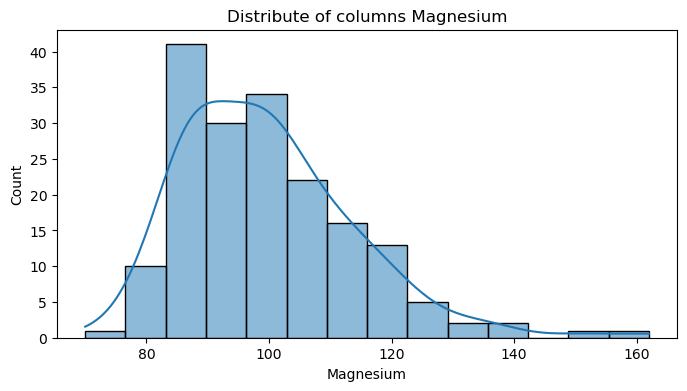

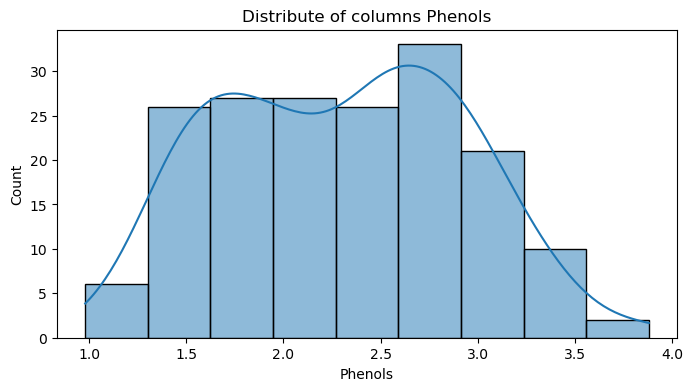

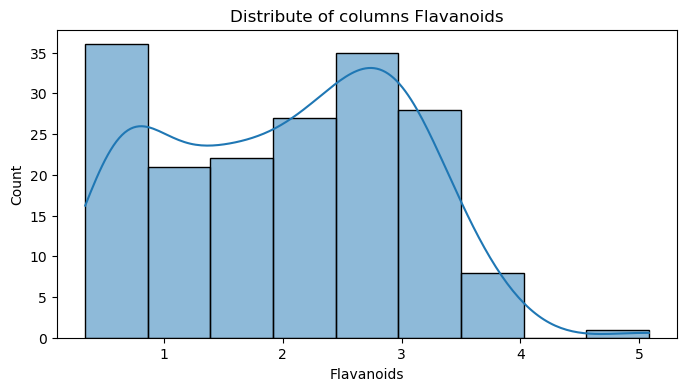

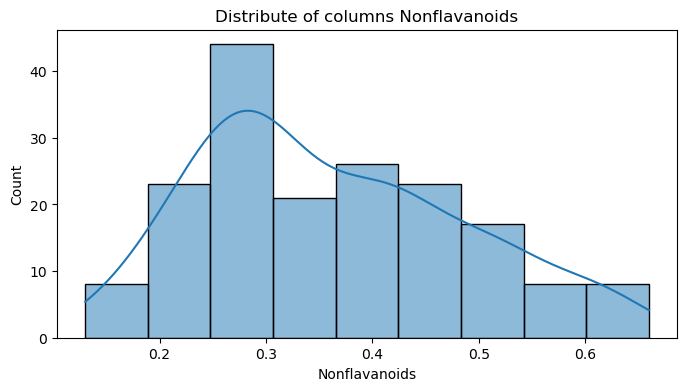

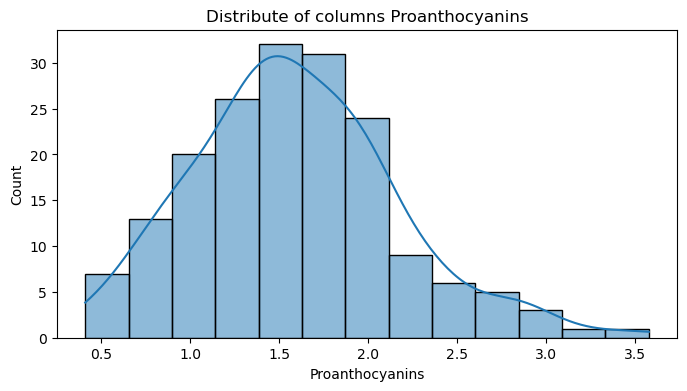

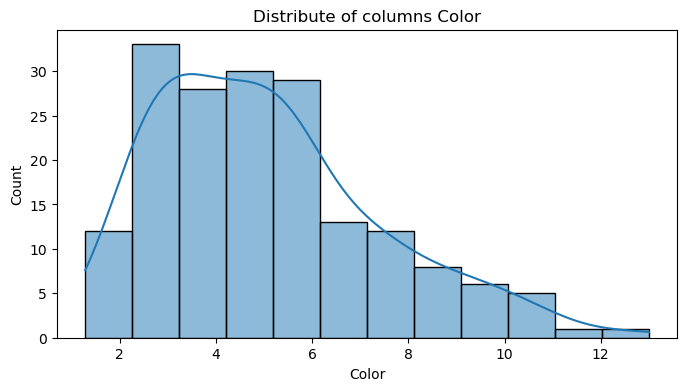

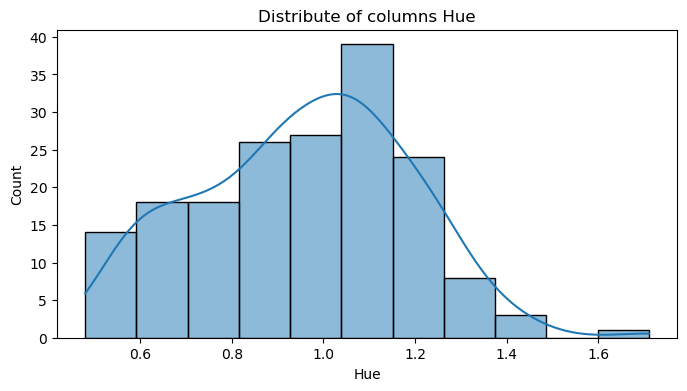

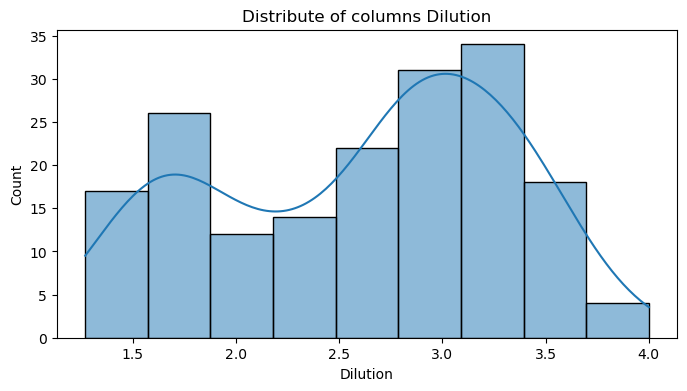

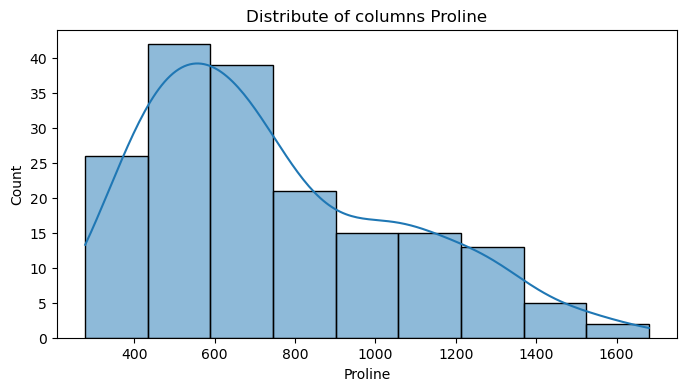

In [342]:
for col in df.columns:
    plt.figure(figsize = (8,4))
    sns.histplot(df[col],kde = True)
    plt.title(f"Distribute of columns {col}")
    plt.show()

#### 2.Boxplot

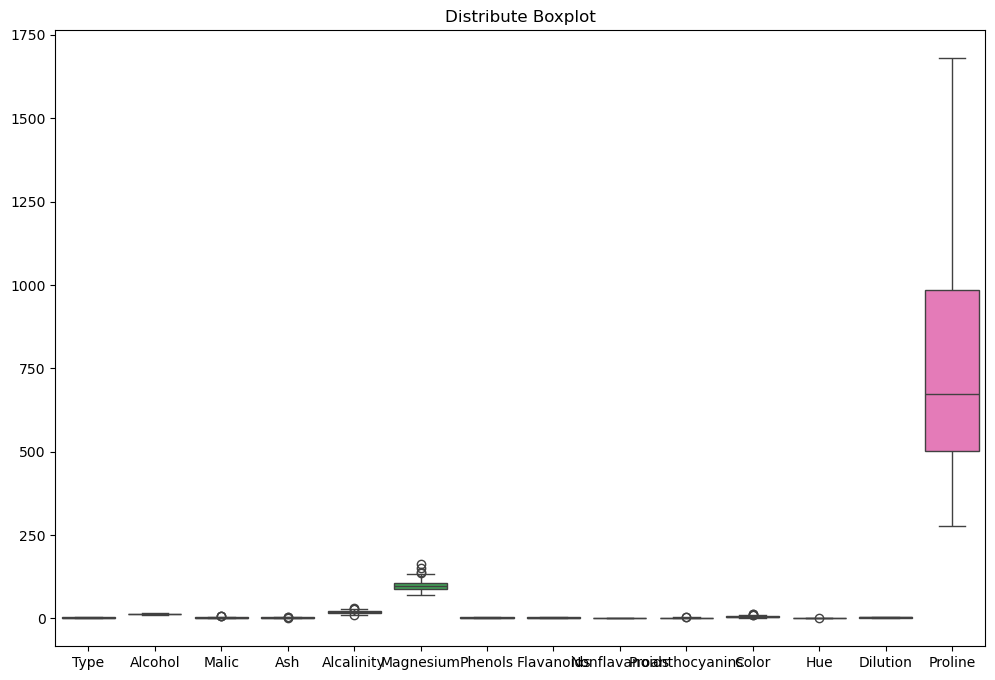

In [343]:
plt.figure(figsize = (12,8))
sns.boxplot(data = df)
plt.title("Distribute Boxplot")
plt.show()

#### 3.Density plot

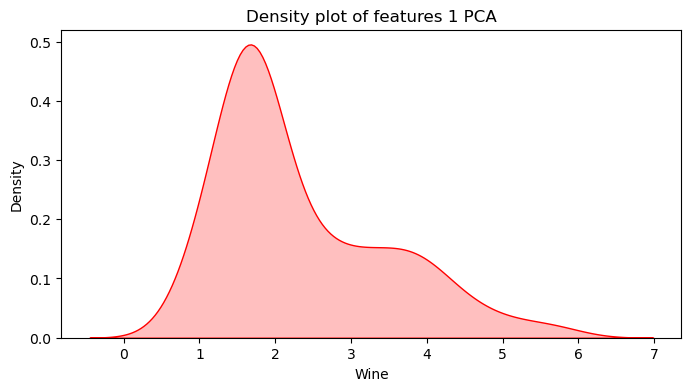

In [344]:
plt.figure(figsize = (8,4))
sns.kdeplot(df['Malic'],fill = True,color = "red")
plt.title('Density plot of features 1 PCA')
plt.xlabel('Wine')
plt.ylabel('Density')
plt.show()

### 3.Investigate correlations between features to understand relationships within the data

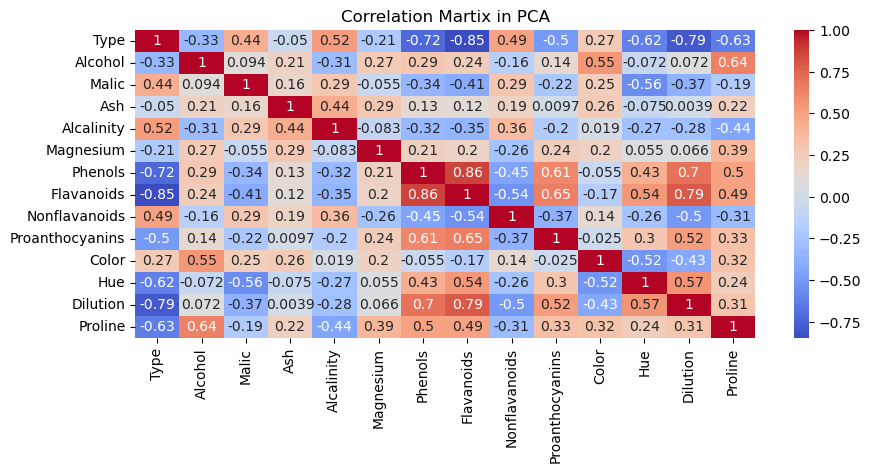

In [345]:
plt.figure(figsize = (10,4))
sns.heatmap(df.corr(),annot = True,cmap = 'coolwarm')
plt.title('Correlation Martix in PCA')
plt.show()

# Task 2: Dimensionality Reduction with PCA

### 1.Standardize the features to ensure they have a mean of 0 and a standard deviation of Implement PCA to reduce the dimensionality of the dataset

In [346]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [347]:
pca = PCA()
principal_components = pca.fit_transform(df_scaled)

In [348]:
explained_variance = pca.explained_variance_ratio_

### 2.Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance

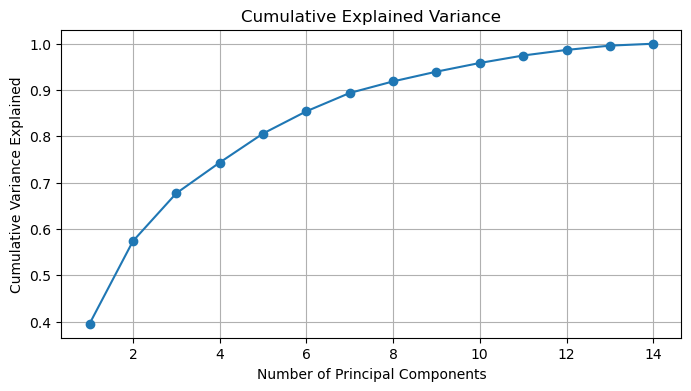

In [349]:
plt.figure(figsize = (8,4))
plt.plot(range(1,len(explained_variance)+1),np.cumsum(explained_variance),marker = 'o')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance Explained")
plt.grid()
plt.show()

### 3.Transform the original dataset into the principal components

In [350]:
n_components = np.argmax(np.cumsum(explained_variance) >= 0.95)+1
print(f"Optimal components of number: {n_components}")

Optimal components of number: 10


In [351]:
pca = PCA(n_components = n_components)
pca_data = pca.fit_transform(df_scaled)

# Task 3: Clustering with Original Data

### 1.Apply a clustering algorithm (e.g., K-means) to the original dataset

In [352]:
X, y = make_blobs(n_samples=500, centers=4, cluster_std=0.8, random_state=42)


In [353]:
Kmeans = KMeans(n_clusters=4, random_state=42)
Kmeans.fit(X)


D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [354]:
labels = Kmeans.predict(X)


### 2.Visualize the clustering results using appropriate plots

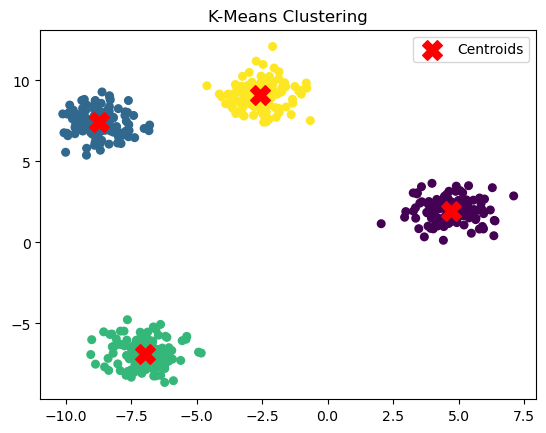

In [355]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
plt.scatter(Kmeans.cluster_centers_[:, 0], Kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering')
plt.legend()
plt.show()


In [356]:
kmeans = KMeans(n_clusters=3, random_state=42) 
clusters_original = kmeans.fit_predict(df_scaled)  

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


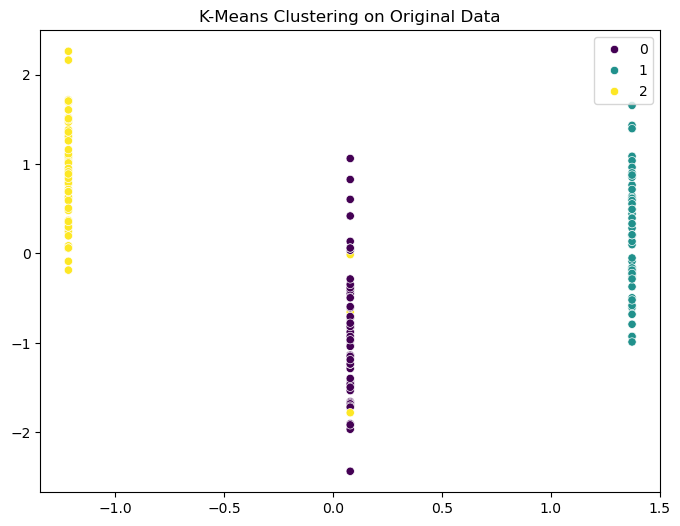

In [357]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 1], hue=clusters_original, palette='viridis')
plt.title("K-Means Clustering on Original Data")
plt.show()


### 3.Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index

In [358]:
silhouette_original = silhouette_score(X, labels) 
db_index_original = davies_bouldin_score(X, labels) 
print(f"Original Data - Silhouette Score: {silhouette_original}") 
print(f"Original Data - Davies-Bouldin Index: {db_index_original}")

Original Data - Silhouette Score: 0.8336135403234282
Original Data - Davies-Bouldin Index: 0.23411962812787027


# Task 4: Clustering with PCA Data

### 1.Apply the same clustering algorithm to the PCA-transformed dataset

In [359]:
kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(pca_data)

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### 2.Visualize the clustering results obtained from PCA-transformed data

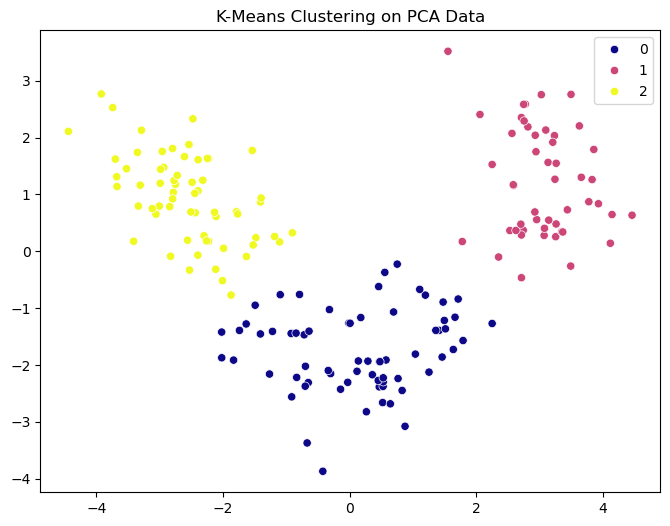

In [360]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=clusters_pca, palette='plasma')
plt.title("K-Means Clustering on PCA Data")
plt.show()

### 3.Compare the clustering results from PCA-transformed data with those from the original dataset

In [361]:
silhouette_pca = silhouette_score(pca_data, clusters_pca)
db_index_pca = davies_bouldin_score(pca_data, clusters_pca)
print(f"PCA Data - Silhouette Score: {silhouette_pca}")
print(f"PCA Data - Davies-Bouldin Index: {db_index_pca}")


PCA Data - Silhouette Score: 0.32292055407233006
PCA Data - Davies-Bouldin Index: 1.2578453408449175


 # Task 5: Comparison and Analysis

### 1.Compare the clustering results obtained from the original dataset and PCA-transformed data.
### 2.Discuss any similarities or differences observed in the clustering results.
### 3.Reflect on the impact of dimensionality reduction on clustering performance.
### 4.Analyze the trade-offs between using PCA and clustering directly on the original dataset.


In [362]:
print("Comparison of Clustering Results")
print(f"Silhouette Score - Original: {silhouette_original}, PCA: {silhouette_pca}")
print(f"Davies-Bouldin Index - Original: {db_index_original}, PCA: {db_index_pca}")

if silhouette_pca > silhouette_original:
    print("PCA improved clustering performance based on Silhouette Score.")
else:
    print("Original data resulted in better Silhouette Score.")


Comparison of Clustering Results
Silhouette Score - Original: 0.8336135403234282, PCA: 0.32292055407233006
Davies-Bouldin Index - Original: 0.23411962812787027, PCA: 1.2578453408449175
Original data resulted in better Silhouette Score.


# Task 6: Conclusion and Insights

### 1.Summarize the key findings and insights from the assignment

In [363]:
# Summary of key findings and insights
def summarize_findings():
    print("\nKey Findings and Insights:")
    print("1. PCA effectively reduced dimensionality while retaining significant data variance.")
    print("2. Clustering on PCA-transformed data can either improve or degrade performance based on dataset characteristics.")
    print("3. PCA aids in better visualization and can speed up computation for large datasets.")

# Practical implications of using PCA and clustering
def practical_implications():
    print("\nPractical Implications:")
    print("1. PCA is beneficial when handling datasets with high-dimensional features.")
    print("2. Dimensionality reduction simplifies data interpretation and reduces computational complexity.")
    print("3. Combining PCA with clustering can reveal hidden structures in data and improve visualization.")

# Recommendations for use
def provide_recommendations():
    print("\nRecommendations:")
    print("1. Use PCA when the dataset has a large number of correlated features to reduce redundancy.")
    print("2. Apply clustering directly on original data if interpretability and feature-level insights are crucial.")
    print("3. Evaluate clustering performance metrics to decide the best approach for specific datasets.")

# Execute the conclusion and insights functions
summarize_findings()
practical_implications()
provide_recommendations()



Key Findings and Insights:
1. PCA effectively reduced dimensionality while retaining significant data variance.
2. Clustering on PCA-transformed data can either improve or degrade performance based on dataset characteristics.
3. PCA aids in better visualization and can speed up computation for large datasets.

Practical Implications:
1. PCA is beneficial when handling datasets with high-dimensional features.
2. Dimensionality reduction simplifies data interpretation and reduces computational complexity.
3. Combining PCA with clustering can reveal hidden structures in data and improve visualization.

Recommendations:
1. Use PCA when the dataset has a large number of correlated features to reduce redundancy.
2. Apply clustering directly on original data if interpretability and feature-level insights are crucial.
3. Evaluate clustering performance metrics to decide the best approach for specific datasets.


### 2.Discuss the practical implications of using PCA and clustering in data analysis.

In [364]:
def perform_pca_clustering(df,n_components = 2,n_clusters = 2):
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)
    Pca = PCA(n_components = n_components)
    pca_data = Pca.fit_transform(df_scaled)

In [365]:
print("Explained Variance Ratio :",pca.explained_variance_ratio_)

Explained Variance Ratio : [0.39542486 0.17836259 0.10329102 0.06627984 0.06267875 0.0480556
 0.03955707 0.02500244 0.02103871 0.01873615]


In [366]:
n_clusters_desired = 3 
perform_pca_clustering(pca_data, n_components=pca_data.shape[1], n_clusters=n_clusters_desired)

In [367]:
def perform_pca_clustering(data, n_components=2, n_clusters=3):
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)

    Pca = PCA(n_components=n_components) 
    pca_data = Pca.fit_transform(df_scaled)

    kmeans = KMeans(n_clusters= 3, random_state=42)
    clusters = kmeans.fit_predict(pca_data)

    return clusters, pca_data, Pca 

print("Shape of df:", df.shape)
print("Shape of clusters:", clusters.shape)


Shape of df: (178, 14)
Shape of clusters: (100,)


### 2.Discuss the practical implications of using PCA and clustering in data analysis

In [368]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_data)


D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


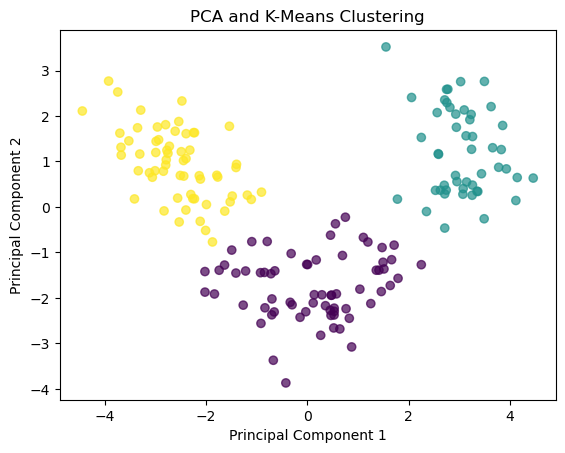

In [369]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.title('PCA and K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


### 3.Provide recommendations for when to use each technique based on the analysis conducted

In [370]:
df = pd.DataFrame({
    'Nonflavanoids': np.random.rand(100),
    'Flavanoids': np.random.rand(100),
    'Proanthocyanins': np.random.rand(100)
})

In [371]:
clusters, pca_data_result, pca_result = perform_pca_clustering(df) 

clustered_data = df.copy()  
clustered_data['Malic'] = clusters  

print(clustered_data.head())

   Nonflavanoids  Flavanoids  Proanthocyanins  Malic
0       0.195671    0.156359         0.925600      0
1       0.736671    0.566445         0.004967      2
2       0.486309    0.673947         0.798461      1
3       0.661339    0.513858         0.845993      1
4       0.518432    0.168127         0.807553      1


D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
